In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

In [2]:
from static_grader import grader

# DW Miniproject
## Introduction

The objective of this miniproject is to exercise your ability to wrangle tabular data set and aggregate large data sets into meaningful summary statistics. We will be working with the same medical data used in the `pw` miniproject, but will be leveraging the power of Pandas to more efficiently represent and act on our data.

## Downloading the data

We first need to download the data we'll be using from Amazon S3:

In [5]:
!mkdir dw-data
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201701scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/201606scripts_sample.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/practices.csv.gz -nc -P ./dw-data/
!wget http://dataincubator-wqu.s3.amazonaws.com/dwdata/chem.csv.gz -nc -P ./dw-data/

mkdir: cannot create directory ‘dw-data’: File exists
File ‘./dw-data/201701scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/201606scripts_sample.csv.gz’ already there; not retrieving.

File ‘./dw-data/practices.csv.gz’ already there; not retrieving.

File ‘./dw-data/chem.csv.gz’ already there; not retrieving.



## Loading the data

Similar to the `PW` miniproject, the first step is to read in the data. The data files are stored as compressed CSV files. You can load the data into a Pandas DataFrame by making use of the `gzip` package to decompress the files and Panda's `read_csv` methods to parse the data into a DataFrame. You may want to check the Pandas documentation for parsing [CSV](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) files for reference.

For a description of the data set please, refer to the [PW miniproject](./pw.ipynb). **Note that all questions make use of the 2017 data only, except for Question 5 which makes use of both the 2017 and 2016 data.**

In [3]:
import pandas as pd
import numpy as np
import gzip

In [4]:
# load the 2017 data
scripts = pd.read_csv('./dw-data/201701scripts_sample.csv.gz')
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [5]:
col_names=[ 'code', 'name', 'addr_1', 'addr_2', 'borough', 'village', 'post_code']
practices = pd.read_csv('./dw-data/practices.csv.gz', names = col_names)
practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,NaN,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [6]:
chem = pd.read_csv('./dw-data/chem.csv.gz')
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [128]:
test = pd.DataFrame(chem.head()) #testowa df do ćwiczenia metody .drop z warunkiem

In [130]:
test['items'] = [1,2,3,4,5]

In [133]:
test.drop(test['items'] < 3)

,CHEM SUB,NAME,items
2,0101010C0,Aluminium Hydroxide,3
3,0101010D0,Aluminium Hydroxide With Magnesium,4
4,0101010E0,Hydrotalcite,5


Now that we've loaded in the data, let's first replicate our results from the `PW` miniproject. Note that we are now working with a larger data set so the answers will be different than in the `PW` miniproject even if the analysis is the same.

## Question 1: summary_statistics

In the `PW` miniproject we first calculated the total, mean, standard deviation, and quartile statistics of the `'items'`, `'quantity'`', `'nic'`, and `'act_cost'` fields. To do this we had to write some functions to calculate the statistics and apply the functions to our data structure. The DataFrame has a `describe` method that will calculate most (not all) of these things for us.

Submit the summary statistics to the grader as a list of tuples: [('act_cost', (total, mean, std, q25, median, q75)), ...]

In [7]:
scripts.info() # object w pandas oznacza strings
               # .head(), .info(), .describe() - trzy podstawowe metody, żeby wstępnie poznać data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973193 entries, 0 to 973192
Data columns (total 7 columns):
practice    973193 non-null object
bnf_code    973193 non-null object
bnf_name    973193 non-null object
items       973193 non-null int64
nic         973193 non-null float64
act_cost    973193 non-null float64
quantity    973193 non-null int64
dtypes: float64(2), int64(2), object(3)
memory usage: 52.0+ MB


In [9]:
perc = [.25, .50, .75]
include = ['float', 'int'] 
scripts['items'].describe(percentiles = perc, include = include)

count    973193.000000
mean          9.133136
std          29.204198
min           1.000000
25%           1.000000
50%           2.000000
75%           6.000000
max        2384.000000
Name: items, dtype: float64

In [10]:
items = [sum(scripts['items'])]
quantity = [sum(scripts['quantity'])]
nic = [sum(scripts['nic'])]
act_cost = [sum(scripts['act_cost'])]
items.extend(list(scripts['items'].describe(percentiles = perc, include = include))[1:3] + list(scripts['items'].describe(percentiles = perc, include = include))[4:7])
quantity.extend(list(scripts['quantity'].describe(percentiles = perc, include = include))[1:3] + list(scripts['quantity'].describe(percentiles = perc, include = include))[4:7]) 
nic.extend(list(scripts['nic'].describe(percentiles = perc, include = include))[1:3] + list(scripts['nic'].describe(percentiles = perc, include = include))[4:7]) 
act_cost.extend(list(scripts['act_cost'].describe(percentiles = perc, include = include))[1:3] + list(scripts['act_cost'].describe(percentiles = perc, include = include))[4:7]) 


In [11]:
summary_stats = [('items', tuple(items)), ('quantity', tuple(quantity)), ('nic', tuple(nic)), ('act_cost', tuple(act_cost))]

In [99]:
grader.score.dw__summary_statistics(summary_stats)

Your score:  1.0


## Question 2: most_common_item

We can also easily compute summary statistics on groups within the data. In the `pw` miniproject we had to explicitly construct the groups based on the values of a particular field. Pandas will handle that for us via the `groupby` method. This process is [detailed in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/groupby.html).

Use `groupby` to calculate the total number of items dispensed for each `'bnf_name'`. Find the item with the highest total and return the result as `[(bnf_name, total)]`.

In [12]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [13]:
scripts['bnf_name'].nunique() # liczy wiersze z 'bnf_name' bez powtórzeń, tzn. tyle jest bnf_names w scripts

13471

In [165]:
scripts.groupby('bnf_name')['items'].sum().max() #dataframe pogrupowana wg nazw leków, wyjęta tylko kolumna 'items'. powstaje obiekt 'series'

218583

In [166]:
scripts.groupby('bnf_name')['items'].sum().sort_values(ascending=False)

bnf_name
Omeprazole_Cap E/C 20mg                     218583
Paracet_Tab 500mg                           151669
Aspirin Disper_Tab 75mg                     148591
Simvastatin_Tab 40mg                        132941
Amlodipine_Tab 5mg                          128245
Lansoprazole_Cap 30mg (E/C Gran)            125985
Salbutamol_Inha 100mcg (200 D) CFF          119757
Atorvastatin_Tab 20mg                       111133
Metformin HCl_Tab 500mg                     109818
Bendroflumethiazide_Tab 2.5mg                85940
Amlodipine_Tab 10mg                          85148
Simvastatin_Tab 20mg                         84173
Atorvastatin_Tab 40mg                        83358
Amoxicillin_Cap 500mg                        82706
Ramipril_Cap 10mg                            81965
Levothyrox Sod_Tab 100mcg                    79973
Levothyrox Sod_Tab 50mcg                     78504
Levothyrox Sod_Tab 25mcg                     75805
Clopidogrel_Tab 75mg                         72087
Lansoprazole_Cap 15mg 

In [167]:
scripts.groupby('bnf_name')['items'].cummax()

0          1
1          1
2          1
3          1
4          1
5          1
6          1
7          1
8          1
9          2
10         1
11         1
12         3
13         1
14         1
15         3
16         1
17         2
18         1
19         3
20         1
21         1
22         2
23         1
24         1
25         1
26         1
27         1
28         1
29         1
          ..
973163     8
973164    13
973165     1
973166     1
973167     3
973168     4
973169    12
973170     2
973171     2
973172    21
973173     7
973174    17
973175     6
973176    22
973177    97
973178    26
973179    65
973180     4
973181     6
973182     7
973183    15
973184     1
973185     1
973186     2
973187     6
973188     3
973189     1
973190     2
973191     5
973192     2
Name: items, Length: 973193, dtype: int64

In [17]:
most_common_item = [("Omeprazole_Cap E/C 20mg", 218583)]

In [45]:
grader.score.dw__most_common_item(most_common_item)

Your score:  1.0


## Question 3: items_by_region

Now let's find the most common item by post code. The post code information is in the `practices` DataFrame, and we'll need to `merge` it into the `scripts` DataFrame. Pandas provides [extensive documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) with diagrammed examples on different methods and approaches for joining data. The `merge` method is only one of many possible options.

Return your results as a list of tuples `(post code, item name, amount dispensed as % of total)`. Sort your results ascending alphabetically by post code and take only results from the first 100 post codes.

**NOTE:** Some practices have multiple postal codes associated with them. Use the alphabetically first postal code. Note some postal codes may have multiple `'bnf_name'` with the same prescription rate for the maximum. In this case, take the alphabetically first `'bnf_name'` (as in the PW miniproject).

In [9]:
len(practices['code']) #tyle jest wszystkich kodów praktyk

12020

In [10]:
len(practices['code'].unique()) #tyle jest unikalnych kodów praktyk

10843

In [168]:
len(practices.groupby('code')['post_code'].min()) #bierzemy alfabetycznie pierwszy kod pocztowy dla każdej praktyki - jest ich tyle co unikalnych kodów praktyk, więc powinno się zgadzać

10843

In [104]:
#wg kodów pocztowych, potem grupujemy po kodach praktyk, powinniśmy mieć alfabetycznie posortowane kody pocztowe w każdej grupie
# gdybyśmy chcieli najpierw pogrupować, otrzymalibyśmy obiekt typu group, który nie chce się sortować - stąd zastosowana kolejność
unique_practices = practices.sort_values('post_code').groupby('code').first().reset_index() #najpierw sortujemy alfabetycznie

#łączymy kolumny code i post_code z unique practices z df scripts
joined = scripts.merge(unique_practices[['code', 'post_code']], how='left', left_on='practice', right_on='code')

#liczymy sumę items dla każdego bnf_name i każdego kodu pocztowego
post_items_total = joined.groupby(['post_code', 'bnf_name'])['items'].sum().reset_index() 

# wyznaczamy najczęściej przepisywany lek dla każdego kodu pocztowego; mask to synonim filtru - tworzymy filtr, który pozwoli 
# otrzymać największe wartości items dla każdego kodu
max_item_indices = post_items_total.groupby('post_code')['items'].idxmax()




In [86]:
max_item_indices.head() #w kolumnie items mamy teraz indeksy rzędów, w których mamy największe wartości danego leku

post_code
B11 4BW    1628
B12 9LP    3323
B18 7AL    5293
B21 9RY    6924
B23 6DJ    9096
Name: items, dtype: int64

In [169]:

max_items = post_items_total.loc[max_item_indices].sort_values('post_code')

NameError: name 'post_items_total' is not defined

In [130]:
max_items.head() #to jest df

,post_code,bnf_name,items,items_total
1628,B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,706,NaN
3323,B12 9LP,Paracet_Tab 500mg,425,NaN
5293,B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,556,NaN
6924,B21 9RY,Metformin HCl_Tab 500mg,1033,NaN
9096,B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),599,NaN


In [131]:
total_by_post = post_items_total.groupby('post_code').sum().reset_index() # tu mamy liczbę items ogółem dla każdego kodu pocztowego

In [132]:
total_by_post.head()

,post_code,items
0,B11 4BW,22731
1,B12 9LP,17073
2,B18 7AL,20508
3,B21 9RY,31027
4,B23 6DJ,28011


In [135]:
joined = max_items.merge(total_by_post[['post_code', 'items']], how='left', on='post_code')
joined.drop('items_total', axis=1, inplace=True)

In [137]:
joined['proportion'] = joined['items_x']/joined['items_y']

In [139]:
joined.drop(['items_x', 'items_y'], axis=1, inplace=True)

In [140]:
joined.head()

,post_code,bnf_name,proportion
0,B11 4BW,Salbutamol_Inha 100mcg (200 D) CFF,0.031059
1,B12 9LP,Paracet_Tab 500mg,0.024893
2,B18 7AL,Salbutamol_Inha 100mcg (200 D) CFF,0.027111
3,B21 9RY,Metformin HCl_Tab 500mg,0.033294
4,B23 6DJ,Lansoprazole_Cap 30mg (E/C Gran),0.021384


In [146]:
items_by_region = list(zip(joined.post_code, joined.bnf_name, joined.proportion))[:100]

In [ ]:
items_by_region = [("B11 4BW", "Salbutamol_Inha 100mcg (200 D) CFF", 0.0310589063)] * 100

In [148]:
grader.score.dw__items_by_region(items_by_region)

Your score:  1.0


## Question 4: script_anomalies

Drug abuse is a source of human and monetary costs in health care. A first step in identifying practitioners that enable drug abuse is to look for practices where commonly abused drugs are prescribed unusually often. Let's try to find practices that prescribe an unusually high amount of opioids. The opioids we'll look for are given in the list below.

In [10]:
opioids = ['morphine', 'oxycodone', 'methadone', 'fentanyl', 'pethidine', 'buprenorphine', 'propoxyphene', 'codeine']

These are generic names for drugs, not brand names. Generic drug names can be found using the `'bnf_code'` field in `scripts` along with the `chem` table.. Use the list of opioids provided above along with these fields to make a new field in the `scripts` data that flags whether the row corresponds with a opioid prescription.

In [88]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [149]:
chem.head()

,CHEM SUB,NAME
0,0101010A0,Alexitol Sodium
1,0101010B0,Almasilate
2,0101010C0,Aluminium Hydroxide
3,0101010D0,Aluminium Hydroxide With Magnesium
4,0101010E0,Hydrotalcite


In [11]:
joined2 = scripts.merge(chem, how='left', left_on='bnf_code', right_on='CHEM SUB')

In [12]:
joined2['opioid'] = 0

In [13]:
joined2.iloc[974008]

practice                                      H81615
bnf_code                                   239607096
bnf_name    Dansac_Nova 1 Convex Urost Pouch Clr C/F
items                                              2
nic                                           329.76
act_cost                                      305.28
quantity                                          60
CHEM SUB                                         NaN
NAME                                             NaN
opioid                                             0
Name: 974008, dtype: object

In [14]:
joined2['NAME'] = joined2['NAME'].fillna('xxx')

In [15]:
joined2.tail()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,CHEM SUB,NAME,opioid
974005,H81615,239410100,Coloplast_SenSura Mio Flex B/Plt 50mm C/,1,78.92,73.06,20,NaN,xxx,0
974006,H81615,239410100,Coloplast_SenSura Mio Flex Clsd Bag Mini,1,106.36,98.46,60,NaN,xxx,0
974007,H81615,239410100,Coloplast_SenSura Mio Flex Clsd Bag Midi,1,159.54,147.69,90,NaN,xxx,0
974008,H81615,239607096,Dansac_Nova 1 Convex Urost Pouch Clr C/F,2,329.76,305.28,60,NaN,xxx,0
974009,H81615,239610096,Coloplast_SenSura Mio Urost Bag Maxi Tra,1,182.48,168.93,30,NaN,xxx,0


In [16]:
'|'.join(opioids)

'morphine|oxycodone|methadone|fentanyl|pethidine|buprenorphine|propoxyphene|codeine'

In [17]:
joined2['opioid'] = joined2['NAME'].str.contains('|'.join(opioids), case=False) #wypełniamy kolumnę opioid wartościami True i False
#w zależności od tego, czy w NAME jest jeden ze str z opioids

In [18]:
joined2['opioid'].sum()

34843

Now for each practice calculate the proportion of its prescriptions containing opioids.

**Hint:** Consider the following list: `[0, 1, 1, 0, 0, 0]`. What proportion of the entries are 1s? What is the mean value?

In [21]:
opioids_per_practice = joined2.groupby('practice')['opioid'].mean()

In [22]:
opioids_per_practice.head()

practice
A81005    0.033135
A81007    0.043269
A81011    0.046526
A81012    0.042761
A81017    0.038122
Name: opioid, dtype: float64

How do these proportions compare to the overall opioid prescription rate? Subtract off the proportion of all prescriptions that are opioids from each practice's proportion.

In [24]:
opioids_for_all = joined2['opioid'].mean() #średnia wszystkich wartości z kolumny opioids

In [26]:
opioids_for_all

0.035772733339493434

In [31]:
relative_opioids_per_practice =  opioids_per_practice - opioids_for_all

In [32]:
relative_opioids_per_practice.head() #licznik

practice
A81005   -0.002638
A81007    0.007496
A81011    0.010754
A81012    0.006988
A81017    0.002349
Name: opioid, dtype: float64

In [ ]:
relative_opioids_per_practice.reset_index().head() #to jest typ series #licznik

In [ ]:
joined2.groupby('practice').size().head() #liczba recept dla practice?

Now that we know the difference between each practice's opioid prescription rate and the overall rate, we can identify which practices prescribe opioids at above average or below average rates. However, are the differences from the overall rate important or just random deviations? In other words, are the differences from the overall rate big or small?

To answer this question we have to quantify the difference we would typically expect between a given practice's opioid prescription rate and the overall rate. This quantity is called the **standard error**, and is related to the **standard deviation**, $\sigma$. The standard error in this case is

$$ \frac{\sigma}{\sqrt{n}} $$

where $n$ is the number of prescriptions each practice made. Calculate the standard error for each practice. Then divide `relative_opioids_per_practice` by the standard errors. We'll call the final result `opioid_scores`.

In [92]:
# standard_error_per_practice = joined2['opioid'].std() / (joined2['practice'].value_counts() ** 1/2)
standard_error_per_practice = np.sqrt(joined2['opioid'].var() / joined2['practice'].value_counts())

In [93]:
standard_error_per_practice.head()

N83028    0.003481
L83100    0.003510
D81043    0.003744
B81008    0.003793
B81026    0.003832
Name: practice, dtype: float64

In [94]:
opioid_scores = relative_opioids_per_practice / standard_error_per_practice

In [95]:
opioid_scores.head()

A81005   -0.551807
A81007    1.540186
A81011    2.293528
A81012    1.373723
A81017    0.586611
dtype: float64

The quantity we have calculated in `opioid_scores` is called a **z-score**:

$$ \frac{\bar{X} - \mu}{\sqrt{\sigma^2/n}} $$

Here $\bar{X}$ corresponds with the proportion for each practice, $\mu$ corresponds with the proportion across all practices, $\sigma^2$ corresponds with the variance of the proportion across all practices, and $n$ is the number of prescriptions made by each practice. Notice $\bar{X}$ and $n$ will be different for each practice, while $\mu$ and $\sigma$ are determined across all prescriptions, and so are the same for every z-score. The z-score is a useful statistical tool used for hypothesis testing, finding outliers, and comparing data about different types of objects or events.

Now that we've calculated this statistic, take the 100 practices with the largest z-score. Return your result as a list of tuples in the form `(practice_name, z-score, number_of_scripts)`. Sort your tuples by z-score in descending order. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [116]:
top_opioids = opioid_scores.sort_values(ascending=False)[:100]

In [117]:
top_opioids = pd.DataFrame(top_opioids.rename('z_score'))

In [120]:
top_opioids = top_opioids.reset_index()


In [122]:
unique_practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,MCKENZIE HOUSE,17 KENDAL ROAD,HARTLEPOOL,CLEVELAND,TS25 1QU
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,ACKLAM,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [121]:
top_opioids.head()

,index,z_score
0,Y01852,11.700972
1,Y03006,7.342237
2,Y03668,6.154320
3,G81703,5.126073
4,Y04997,4.963767


In [123]:
results = top_opioids.merge(unique_practices[['name', 'code']], how='left', left_on='index', right_on='code')

In [135]:
results.head()

,index,z_score,name,code
0,Y01852,11.700972,NATIONAL ENHANCED SERVICE,Y01852
1,Y03006,7.342237,OUTREACH SERVICE NH / RH,Y03006
2,Y03668,6.154320,BRISDOC HEALTHCARE SERVICES OOH,Y03668
3,G81703,5.126073,H&R P C SPECIAL SCHEME,G81703
4,Y04997,4.963767,HMR BARDOC OOH,Y04997


In [136]:
total_prescriptions_per_practice = pd.DataFrame(scripts.groupby('practice').size().rename('n_scripts'))

In [137]:
total_prescriptions_per_practice = total_prescriptions_per_practice.reset_index()

In [138]:
total_prescriptions_per_practice.head()

,practice,n_scripts
0,A81005,1507
1,A81007,1454
2,A81011,1568
3,A81012,1332
4,A81017,2150


In [139]:
full_results = results.merge(total_prescriptions_per_practice[['practice', 'n_scripts']], how='left', left_on='code', right_on='practice')

In [140]:
full_results.head()

,index,z_score,name,code,practice,n_scripts
0,Y01852,11.700972,NATIONAL ENHANCED SERVICE,Y01852,Y01852,7
1,Y03006,7.342237,OUTREACH SERVICE NH / RH,Y03006,Y03006,2
2,Y03668,6.154320,BRISDOC HEALTHCARE SERVICES OOH,Y03668,Y03668,60
3,G81703,5.126073,H&R P C SPECIAL SCHEME,G81703,G81703,36
4,Y04997,4.963767,HMR BARDOC OOH,Y04997,Y04997,321


In [141]:
full_results = full_results[['name', 'z_score', 'n_scripts']]

In [142]:
full_results.head()

,name,z_score,n_scripts
0,NATIONAL ENHANCED SERVICE,11.700972,7
1,OUTREACH SERVICE NH / RH,7.342237,2
2,BRISDOC HEALTHCARE SERVICES OOH,6.154320,60
3,H&R P C SPECIAL SCHEME,5.126073,36
4,HMR BARDOC OOH,4.963767,321


In [143]:
anomalies = list(zip(full_results.name, full_results.z_score, full_results.n_scripts))

In [144]:
anomalies[:20]

[('NATIONAL ENHANCED SERVICE', 11.700971787589962, 7),
 ('OUTREACH SERVICE NH / RH', 7.342237296165327, 2),
 ('BRISDOC HEALTHCARE SERVICES OOH', 6.154319628928264, 60),
 ('H&R P C SPECIAL SCHEME', 5.126072754058587, 36),
 ('HMR BARDOC OOH', 4.963767331557864, 321),
 ('INTEGRATED CARE 24 LTD (CWSX OOH)', 4.894191128239315, 426),
 ('DARWEN HEALTHCARE', 4.836873272398607, 1917),
 ('THE LIMES MEDICAL PRACTICE', 4.5405213699735345, 1321),
 ('IC24 LTD (BRIGHTON & HOVE OOH)', 4.339853965026435, 357),
 ('OLDHAM 7 DAY ACCESS HUB2 OOH', 4.314736414688714, 56),
 ('IC24 LTD (NORFOLK & WISBECH OOH)', 4.262796706819222, 489),
 ('ROSSENDALE MIU & OOH', 4.2592336012244125, 18),
 ('BURY WALK-IN CENTRE', 4.15416585609558, 138),
 ('IC24 LTD (HORSHAM & MID SUSSEX OOH)', 3.7855197840129207, 215),
 ('LCW HOUNSLOW CCG OOH', 3.5856395010396978, 69),
 ('WEEKEND WORKING EASINGTON NORTH', 3.5700757871725792, 278),
 ('COMPASS ENFIELD', 3.560586108661561, 7),
 ('BASSETLAW DRUG & ALCOHOL SERVICE', 3.53492052032142,

In [ ]:

# anomalies = [("NATIONAL ENHANCED SERVICE", 11.6958178629, 7)] * 100

In [145]:
grader.score.dw__script_anomalies(anomalies)

Your score:  0.9800000000000006


## Question 5: script_growth

Another way to identify anomalies is by comparing current data to historical data. In the case of identifying sites of drug abuse, we might compare a practice's current rate of opioid prescription to their rate 5 or 10 years ago. Unless the nature of the practice has changed, the profile of drugs they prescribe should be relatively stable. We might also want to identify trends through time for business reasons, identifying drugs that are gaining market share. That's what we'll do in this question.

We'll load in beneficiary data from 6 months earlier, June 2016, and calculate the percent growth in prescription rate from June 2016 to January 2017 for each `bnf_name`. We'll return the 50 items with largest growth and the 50 items with the largest shrinkage (i.e. negative percent growth) as a list of tuples sorted by growth rate in descending order in the format `(script_name, growth_rate, raw_2016_count)`. You'll notice that many of the 50 fastest growing items have low counts of prescriptions in 2016. Filter out any items that were prescribed less than 50 times.

In [323]:
scripts16 = pd.read_csv('./dw-data/201606scripts_sample.csv.gz')

In [324]:
scripts16.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85638,0301011R0,Salamol_Inha 100mcg (200 D) CFF (Teva),2,2.92,2.73,2
1,N85638,0301011R0,Easyhaler_Salbutamol Sulf 200mcg (200D),1,6.63,6.15,1
2,N85638,0301020I0,Ipratrop Brom_Inh Soln 500mcg/2ml Ud,1,1.77,1.75,12
3,N85638,0301020I0,Ipratrop Brom_Inh Soln 250mcg/1ml Ud,1,4.47,4.15,20
4,N85638,0302000C0,Clenil Modulite_Inha 50mcg (200D),1,3.70,3.44,1


In [350]:
items16 = pd.DataFrame(scripts16.groupby('bnf_name').size().sort_values(ascending=False).rename('prescr_16')).reset_index()

In [348]:
items16.head()

,bnf_name,prescr_16
0,GlucoRX FinePoint Needles Pen Inj Screw,1532
1,3m Health Care_Cavilon Durable Barrier C,825
2,Fluclox Sod_Cap 500mg,796
3,Amoxicillin_Cap 500mg,790
4,Prednisolone_Tab 5mg,786


In [352]:
items16 = items16[items16['prescr_16'].map(lambda x: x>=50)] #zostawiamy tylko te wiersze, gdzie wartość prescr_16 jest >=50

In [328]:
items16.shape

(3519, 2)

In [353]:
items17 = scripts.groupby('bnf_name').size().sort_values(ascending=False)

In [354]:
items17 = pd.DataFrame(items17.rename('prescr_17')).reset_index()

In [355]:
items17.head()

,bnf_name,prescr_17
0,GlucoRX FinePoint Needles Pen Inj Screw,1718
1,3m Health Care_Cavilon Durable Barrier C,816
2,Prednisolone_Tab 5mg,785
3,Fluclox Sod_Cap 500mg,783
4,Amoxicillin_Cap 500mg,777


In [356]:
type(items16)

pandas.core.frame.DataFrame

In [357]:
prescription_rates = items16.merge(items17[['bnf_name', 'prescr_17']], how='left', on='bnf_name')

In [358]:
prescription_rates.shape

(3519, 3)

In [359]:
prescription_rates['prescr_17'] = prescription_rates['prescr_17'].fillna(0)

In [404]:
prescription_rates['prescr_16'] = prescription_rates['prescr_16'].astype(float)

In [406]:
prescription_rates.head()

,bnf_name,prescr_16,prescr_17,growth
3180,Butec_Transdermal Patch 5mcg/hr,62.0,277.0,3.467742
3018,Butec_Transdermal Patch 10mcg/hr,69.0,276.0,3.000000
2684,Fostair NEXThaler_Inh 200mcg/6mcg (120D),86.0,209.0,1.430233
1590,Pneumococcal_Vac 0.5ml Vl (23 Valent),193.0,438.0,1.269430
3463,Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,52.0,118.0,1.269231


In [428]:
prescription_rates['growth'] = (prescription_rates['prescr_17'] - prescription_rates['prescr_16']) / prescription_rates['prescr_16']

In [429]:
big = prescription_rates.sort_values(ascending=False, by='growth')[:50]

In [430]:
small = prescription_rates.sort_values(by='growth')[:50]

In [431]:
big.head()

,bnf_name,prescr_16,prescr_17,growth
3180,Butec_Transdermal Patch 5mcg/hr,62.0,277.0,3.467742
3018,Butec_Transdermal Patch 10mcg/hr,69.0,276.0,3.000000
2684,Fostair NEXThaler_Inh 200mcg/6mcg (120D),86.0,209.0,1.430233
1590,Pneumococcal_Vac 0.5ml Vl (23 Valent),193.0,438.0,1.269430
3463,Spiolto Respimat_Inha2.5/2.5mcg(60D)+Dev,52.0,118.0,1.269231


In [433]:
script_growth = []
big_list = list(zip(big.bnf_name, big.growth, big.prescr_16))
small_list = list(zip(small.bnf_name, small.growth, small.prescr_16))
script_growth.extend(big_list)
script_growth.extend(small_list)

In [434]:
script_growth[0]

('Butec_Transdermal Patch 5mcg/hr', 3.467741935483871, 62.0)

In [ ]:
#script_growth = [("Butec_Transdermal Patch 5mcg\/hr", 3.4677419355, 62.0)] * 100

In [435]:
grader.score.dw__script_growth(script_growth)

Your score:  0.6600000000000004


## Question 6: rare_scripts

Does a practice's prescription costs originate from routine care or from reliance on rarely prescribed treatments? Commonplace treatments can carry lower costs than rare treatments because of efficiencies in large-scale production. While some specialist practices can't help but avoid prescribing rare medicines because there are no alternatives, some practices may be prescribing a unnecessary amount of brand-name products when generics are available. Let's identify practices whose costs disproportionately originate from rarely prescribed items.

First we have to identify which `'bnf_code'` are rare. To do this, find the probability $p$ of a prescription having a particular `'bnf_code'` if the `'bnf_code'` was randomly chosen from the unique options in the beneficiary data. We will call a `'bnf_code'` rare if it is prescribed at a rate less than $0.1p$.

In [8]:
scripts.head()

,practice,bnf_code,bnf_name,items,nic,act_cost,quantity
0,N85639,0106020C0,Bisacodyl_Tab E/C 5mg,1,0.39,0.47,12
1,N85639,0106040M0,Movicol Plain_Paed Pdr Sach 6.9g,1,4.38,4.07,30
2,N85639,0301011R0,Salbutamol_Inha 100mcg (200 D) CFF,1,1.50,1.40,1
3,N85639,0304010G0,Chlorphenamine Mal_Oral Soln 2mg/5ml,1,2.62,2.44,150
4,N85639,0401020K0,Diazepam_Tab 2mg,1,0.16,0.26,6


In [44]:
scripts.groupby('bnf_code').size().head() #daje ten sam wynik co value_counts() poniżej, ale size() wymaga grupowania

bnf_code
0101010C0     34
0101010F0      2
0101010G0    375
0101010I0     34
0101010J0     41
dtype: int64

In [46]:
scripts['bnf_code'].value_counts().head()  #liczymy liczbę recept dla danego 'bnf_code'

0906040G0    14442
090402000    10721
0302000N0     9940
130201000     8602
0601060D0     8563
Name: bnf_code, dtype: int64

In [47]:
scripts['bnf_code'].count() #number of all prescriptions

973193

In [50]:
scripts['bnf_code'].nunique() #liczba unikalnych kodów bnf

1975

In [53]:
p = 1 / scripts['bnf_code'].nunique()

In [54]:
p

0.0005063291139240507

In [55]:
rates = scripts['bnf_code'].value_counts() / scripts['bnf_code'].count() #proportion

In [49]:
rates.head()

0906040G0    0.014840
090402000    0.011016
0302000N0    0.010214
130201000    0.008839
0601060D0    0.008799
Name: bnf_code, dtype: float64

In [56]:
mask = rates < 0.1 * p

In [60]:
rates[mask].index #filtrujemy przez mask i bierzemy same indeksy, czyli w tym przypadku bnf_codes, dostajemy same rzadko przepisywane leki

Index(['0503021E0', '1001030F0', '236001063', '239448100', '0402010P0',
       '220520805', '200900007', '226048860', '236048060', '200315000',
       ...
       '131005000', '1501030D0', '090603200', '0205010AB', '233024030',
       '0501080V0', '1001010AP', '0906012B0', '1308010U0', '200402003'],
      dtype='object', length=844)

In [61]:
len(rates[mask].index)

844

In [63]:
rates[mask].index.nunique() #sprawdzam, czy mam tu same unikalne wartości, nic się nie duplikuje

844

In [65]:
p = 1 / scripts['bnf_code'].nunique()
rates = scripts['bnf_code'].value_counts() / scripts['bnf_code'].count()
mask = rates < 0.1 * p
rare_codes = rates[mask].index
scripts['rare'] = scripts['bnf_code'].isin(rare_codes)

Now for each practice, calculate the proportion of costs that originate from prescription of rare treatments (i.e. rare `'bnf_code'`). Use the `'act_cost'` field for this calculation.

In [86]:
#costs by practice for rare treatments / costs by practice for all treatments

#licznik:
mask2= scripts['rare']
scripts[mask2].groupby('practice')['act_cost'].sum()

#mianownik = licznik bez filtru mask:
scripts.groupby('practice')['act_cost'].sum()

practice
A81005    103840.82
A81007    113482.49
A81011    159507.03
A81012     83296.81
A81017    232656.17
A81018    137860.14
A81021    191580.45
A81023    115803.52
A81029     80193.04
A81031    181548.07
A81032    148022.15
A81033     59222.34
A81034    278866.03
A81037    107192.28
A81038     51775.45
A81040    111232.30
A81049     85202.82
A81052    117152.98
A81058    123735.58
A81064     75086.33
A81065     50061.73
A81602     35991.95
A81610    103381.69
A81611     77957.79
A82035    169484.52
A82036    113856.84
A83051    168700.82
A83071     41920.04
A84007    164523.75
A84009    185819.65
            ...    
Y05233      1351.11
Y05269        50.49
Y05274       554.46
Y05317     44692.85
Y05318     57049.25
Y05320      1883.14
Y05327       213.70
Y05366         5.84
Y05371        16.80
Y05374       266.43
Y05401      1520.78
Y05419      4768.89
Y05430    105675.35
Y05431     90891.92
Y05432     59114.55
Y05433     41317.27
Y05434     51980.71
Y05435     36872.50
Y05438     

In [87]:
rare_cost_prop = (scripts[mask2].groupby('practice')['act_cost'].sum() / scripts.groupby('practice')['act_cost'].sum()).fillna(0)

In [88]:
rare_cost_prop.isnull().sum() #sprawdzamy, czy są wartości None/NaN

0

In [89]:
rare_cost_prop.head()

practice
A81005    0.012017
A81007    0.008381
A81011    0.005116
A81012    0.013747
A81017    0.007359
Name: act_cost, dtype: float64

Now we will calculate a z-score for each practice based on this proportion.
First take the difference of `rare_cost_prop` and the proportion of costs originating from rare treatments across all practices.

In [111]:
# proportion of costs originating from rare treatments across all practices
scripts[mask2]['act_cost'].sum() / scripts['act_cost'].sum()

0.015962901360950386

In [112]:
rare_cost_prop_all_practices

0.015962901360950386

In [113]:
relative_rare_cost_prop = rare_cost_prop - (scripts[mask2]['act_cost'].sum() / scripts['act_cost'].sum())

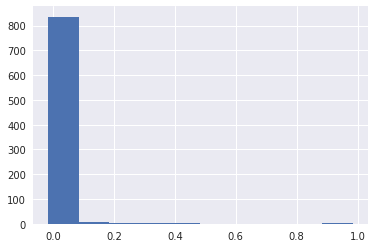

In [114]:
relative_rare_cost_prop.hist() #histogram

Now we will estimate the standard errors (i.e. the denominator of the z-score) by simply taking the standard deviation of this difference.

In [115]:
standard_errors = relative_rare_cost_prop.std()

In [116]:
standard_errors

0.06050888706745139

Finally compute the z-scores. Return the practices with the top 100 z-scores in the form `(post_code, practice_name, z-score)`. Note that some practice codes will correspond with multiple names. In this case, use the first match when sorting names alphabetically.

In [117]:
rare_scores = relative_rare_cost_prop / standard_errors

In [125]:
rare_scores.head()

,act_cost
practice,
A81005,-0.065216
A81007,-0.125308
A81011,-0.179263
A81012,-0.036615
A81017,-0.142190


In [118]:
unique_practices.head()

,code,name,addr_1,addr_2,borough,village,post_code
0,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU
1,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,A81003,VICTORIA MEDICAL PRACTICE,MCKENZIE HOUSE,17 KENDAL ROAD,HARTLEPOOL,CLEVELAND,TS25 1QU
3,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,ACKLAM,MIDDLESBROUGH,CLEVELAND,TS1 3BE
4,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,NaN,TS14 7DJ


In [128]:
rare_scores = rare_scores.sort_values(by = 'act_cost', ascending=False).reset_index()

In [129]:
rare_scores = pd.DataFrame(rare_scores)

In [130]:
rare_scores.head()

,practice,act_cost
0,Y03472,16.262687
1,Y05320,15.128648
2,Y04404,7.542139
3,Y03484,7.287222
4,Y04424,6.838614


In [133]:
result = rare_scores.merge(unique_practices[['code', 'name']], how='left', left_on='practice', right_on='code')[:100]

In [134]:
result.head()

,practice,act_cost,code,name
0,Y03472,16.262687,Y03472,CONSULTANT DIABETES TEAM
1,Y05320,15.128648,Y05320,DMC COMMUNITY DERMATOLOGY RBWF
2,Y04404,7.542139,Y04404,OUTPATIENTS JUBILEE HEALTH CENTRE
3,Y03484,7.287222,Y03484,DMC COMMUNITY DERMATOLOGY CLINIC
4,Y04424,6.838614,Y04424,DMC HEALTHCARE


In [135]:
rare_scripts = list(zip(result.practice, result.name, result.act_cost))

In [ ]:
#rare_scripts = [("Y03472", "CONSULTANT DIABETES TEAM", 16.2626871247)] * 100

In [136]:
grader.score.dw__rare_scripts(rare_scripts)

Your score:  0.9500000000000006


*Copyright &copy; 2019 The Data Incubator.  All rights reserved.*